<style>
    h1{color: red;}
        h2{color: red;}
        h3{color: red;}
        h4{color: red;}
        h5{color: red;}
</style>

# La Commune de Paris 1871 en liberté
ou La Commune dans Wikidata

Ceci est un site personnel qui utilise des données issues de l'univers wikimédia dont wikipédia, commons, wikidata, wikisources...

In [1]:
# pour exporter en html
import plotly.io as pio
pio.renderers.defaut = 'notebook'

In [2]:
from IPython.display import HTML

Table des matières

- [Présentation](#Présentation)
    - [Point grammatical](#Point_grammatical)
    - [Qui suis-je pour le faire ?](#Quisuis-jepourlefaire?)
- [Méthodologie](#Méthodologie)
    - [Wikidata : élément, propriété, valeurs.](#Wikidata:élément,propriété,valeurs.)
    - Sparql et/ou Python
    - Ma stack / mes outils
- [Faire une requête sur wikidata en python](#Faireunerequêtesurwikidataenpython)
- [Portraits de Communardes et Communards](#PortraitsdeCommunardesetCommunards)
    - [Trouver des communard·e·s sur wikidata](#Trouverdescommunard·e·ssurwikidata)
        - L'élément "communard ou communarde"
        - La propriété "occupation"
        - Le triplet ?communard wdt:P106 wd:Q1780490.
    - Les communard·e·s connu·e·s
        - Liste complète
        - Liste complète avec Reasonator
        - Nombre
        - Quelques tests possibles pour vérifier la fiabilité des données.
            - Pour vérifier qu'ils ne sont pas née après ou mort avant la Commune
            - Des êtres vivants
            - Quelques sources
    - Présentations et statistiques à propos des Communard-e-s
        - Galerie de portrait
        - Images de communard·e·s
        - Gender-gap 
        - A part avoir participer à la commune, que faisaient ces personnes ?
            - Au moins deux personnes qui l'occupe
        - Quel age avait ces personnes en 1871
        - Une Commune internationale
     - Relations entre communard·e·s
        - Partenaires de vie
            - Communard·e·s et leur conjoint·e ou partenaire de vie
            - Communard·e·s vivant avec un·e autre communard·e·s
            - Communard·e·s dont le nombre de partenaire est supérieur à 1
        - Généalogie
            - Communard·e·s et leurs enfants
            - Communard·e·s dont les enfants sont communard·e·s
            - Mini-arbres généalogiques parent(s)-> communard·e -> enfant(s)
            - entitree
        - Reseau social des communard·e·s sur wikidata
            - Graph des communard·e·s et des organismes dont als sont membres
            - nombre par organisme
- [Les communardes et communards dans des cimetières](#Lescommunardesetcommunardsdansdescimetières)
     - Généralités
     - Nombre de personne par cimetière
     - Cimetière du Montparnasse
     - Cimetière du Père la Chaise
- Une chronologie
- Les affiches
- Elle n'est pas morte
    - Chansons de la commune et sur la commune
        - chansons, oeuvre... par auteur, parolier...
        - Pour consulter les paroles sur wikisources
    - Commémore
    - Des expositions
- Licence
- Me contacter

## TODO

- [ ] attention, langue autot est plutot en GB que fr, pas mal de mots sortent en anglais
- [ ] point médian au lieu de -
- [ ] attribuer une licence

## Présentation

### Point grammatical
Pour un certains nombre de raison, j'use du genre grammatical neutre, en l'écrivant selon les règles de grammaire proposées par Alphératz dans son ouvrage Grammaire inclusive du Français. Je signale la première occurrence de ces mots par un \*.

J'emploie ces tournures pour parler de moi-même, et pour éviter des doubles flexions comme communardes et communards.

En neutre, al* faudrait écrire an Communarx et des Communarz. Pour que les moteurs de recherche puissent trouver le site, je décide de garder selon les moments communardes et communards ou ça forme raccourcie communard·e·s.

### Qui suis-je pour le faire ?
Il se trouve que je suis membre de l'association les Amies et amis de la Commune de Paris 1871 depuis pas mal de temps (plus d'une décennie, c'est sûr) quand je n'oublie pas de cotiser... Toutefois, ce site est fait de façon autonome de l’association.

Je ne suis pas du tout historian*, mais geekette, c'est à dire passionæ* d'informatique.
J'ai commenæ à contribuer sur Wikipédia en 2006 puis sur Wikidata à partir de 2017. J'y contribue sous le pseudo Silanoc.

Je ne sais pas aller chercher l'information dans les sources primaires de l'époque, dans les archives... c'est du ressort des histoirans. Par contre j'aime rendre les informations, la donnée, la data accessibles au plus grand nombre. Et c'est là que Wikidata intervient.

C'est un projet libre et gratuit. Tout le monde peut y accéder, y contribuer. N'étant pas rédigé comme Wikipédia, mais étant une base de données, le système a été conçu comme naturellement multilinguistique. De ce fait, toutes les modifications sont accessibles par les locutaires* du monde entier (à quelques détails près). Et c'est très utilisé pour tout ce qui touche à "l'intelligence artificielle" car elle a besoin d'une base de données. Autant lui donner des informations sur un sujet trop souvent ignoré.

> Wikidata est une base de connaissances libre et gratuite qui peut être lue et modifiée tant par des personnes que par des dispositifs informatisés. 
page d'acceuil de wikipédia</quote>

Tout ce site/article est basé sur des données de Wikidata ou des images de Commons. Cela par définition sous licence libre (plusieurs existes). Mes propos sont également sous licence créative commons.

## Méthodologie
Mon objectif est de travailler qu'avec des données contenues dans l'univers wikimédia : wikidata, commons, wikipédia, éventuellement wikisources, wikiquote...

Les données sont collaboratives. Cela nécessite de faire confiance au travail des autres sur lequel je m'appuie. Le maximum d'information doit être sourcé. Dans l'analyse statistique/globale, je fais le pari de leur fiabilité. En cas de doute, il est facile de vérifier au cas par cas.

Les données sont celles que les autres personnes ont déjà rentrées. Il y a donc des trous, des blancs, des manques.

Chacun de mes résultats est donc à introduire par : "en fonction du contenu de wikidata...".

Ce n'est pas une vérité totale et absolue. Mais une partie de la vérité.

C'est un travail vérifiable et reproductible. Toutes les données sont publiques (par définition) et mes méthodes de recherche/calcul sont communicables. Aussi, toute personne peut les évaluer et refaire.

C'est un contenu évolutif en fonction des apports/modifications/suppressions fait à la base de données.

J'apporte aussi du contenu dedans, par des photos, des ajouts, des précisions en fonction de ce que je peux remplir sans me tromper.

### Wikidata : élément, propriété, valeurs.
Wikidata stocke des éléments. Tout ce qui existe (au sens qui peut être décrit) est un potentiel élément. Aussi chaque communard·e·s, barricades, livres, événements... sont un élément. Ils commencent par la lettre Q, puis un nombre en fonction de son ordre de création.

Chaque élément possède une ou plusieurs propriétés. Cela peut être un prénom, une date de création, un coordonnées géographique... Ils commence par un P.

À chaque propriété d'un élément il existe une ou plusieurs valeurs.Cela peut être un nombre, une date, ou un autre élément de wikidata.

Cela fait une série de triplets : éléments, propriété, valeurs.

Plus de détails : https://www.wikidata.org/wiki/Wikidata:Introduction/fr

### Sparql et/ou Python

En plus de travailler sur la Commune mes objectifs sont d'avoir une pratique amatrice en programmation, data analyse et améliorer mes compétences dans ces domaines.

Pour explorer les données sur wikidata, il existe un outils intégré sur le site : https://query.wikidata.org. Il est très utilisé par les personnes travaillant sur le projet. Afin de le mettre en avant, et pour sa facilité d'usage, les requêtes sont d'abord faites en sparql sur l'outil puis insérées dans ce notebook par des iframes.

A chaque fois, je mets la requête telle que l'on peut l'écrire en spraql et la copier/coller. Ce qui vous permet de tout tester et revérifier.

Afin de continuer à pratiquer le Python, et avoir une autres approches les requêtes pourront aussi être refaites dans ce langage de programmation.

### Ma stack / mes outils
- wikidata
- commons
- query.wikidata.org
- openrefine
- jupyter notebook
- python
    - pandas
    - seaborn

## Faire une requête sur wikidata en python

### Méthode

La classe Extraction_wikidata, est une adaption du modèle de réquête en python qui se trouve sur https://query.wikidata.org/

- dans la variable query, il faut copier/coller la requête faite dans query.wikidata.org
- exécuter les cellules "## 0" à "## 5" comme si dessous afin d'obtenir le résultat dans un dataframe exploitable pour faire des manipulations de données.

In [3]:
# les installations nécessaires
# https://rdflib.github.io/sparqlwrapper/
!pip install sparqlwrapper

Defaulting to user installation because normal site-packages is not writeable


In [176]:
!pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 KB 1.7 MB/s eta 0:00:000:00:01m eta 0:00:01


In [181]:
## 0 - import

import sys
from SPARQLWrapper import SPARQLWrapper, JSON
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from IPython.display import HTML

In [3]:
## 1 - les variables

endpoint_url = "https://query.wikidata.org/sparql"

query = """SELECT ?communard_ou_communarde ?communard_ou_communardeLabel WHERE {
  SERVICE wikibase:label { bd:serviceParam wikibase:language "[AUTO_LANGUAGE],en". }
  ?communard_ou_communarde wdt:P106 wd:Q1780490.
}"""

In [4]:
## 2 - l'objet

class Extraction_wikidata():
    def __init__(self, endpoint_url, query):
        self.endpoint_url = endpoint_url
        self.query = query
        
    
    def get_results(self, endpoint_url, query):
        user_agent = "WDQS-example Python/%s.%s" % (sys.version_info[0], sys.version_info[1])
        # TODO adjust user agent; see https://w.wiki/CX6
        sparql = SPARQLWrapper(endpoint_url, agent = user_agent)
        sparql.setQuery(query)
        sparql.setReturnFormat(JSON)
        return sparql.query().convert()
    
    def json_to_df(self, entree):
        #results = sparql.query().convert()
        df_results = pd.json_normalize(entree["results"]["bindings"])
        return df_results
    
    def extraire_et_df(self):
        extract_json = self.get_results(self.endpoint_url, self.query)
        extract_df = self.json_to_df(extract_json)
        return extract_df


In [5]:
## 3 - instantiation de l'objet et récupération du df
extraction_communard = Extraction_wikidata(endpoint_url, query)
df_communard = extraction_communard.extraire_et_df()

In [6]:
## 4 - afficher le df voulu
print(df_communard)

    communard_ou_communarde.type              communard_ou_communarde.value   
0                            uri    http://www.wikidata.org/entity/Q3083515  \
1                            uri    http://www.wikidata.org/entity/Q3089740   
2                            uri    http://www.wikidata.org/entity/Q3093932   
3                            uri    http://www.wikidata.org/entity/Q3098972   
4                            uri    http://www.wikidata.org/entity/Q3099150   
..                           ...                                        ...   
295                          uri  http://www.wikidata.org/entity/Q115257385   
296                          uri  http://www.wikidata.org/entity/Q115257386   
297                          uri  http://www.wikidata.org/entity/Q115257387   
298                          uri  http://www.wikidata.org/entity/Q115257388   
299                          uri  http://www.wikidata.org/entity/Q118198782   

    communard_ou_communardeLabel.xml:lang communard

In [7]:
## 5 - quelques statistiques sur le df
df_communard.describe()

,communard_ou_communarde.type,communard_ou_communarde.value,communard_ou_communardeLabel.xml:lang,communard_ou_communardeLabel.type,communard_ou_communardeLabel.value
count,300,300,296,300,300
unique,1,300,1,1,300
top,uri,http://www.wikidata.org/entity/Q3083515,en,literal,François Louis Parisel
freq,300,1,296,300,1


In [11]:
#df_communard_en_html = df_communard.to_html(columns = ['communard_ou_communarde.value', 'communard_ou_communardeLabel.value'])
#HTML(df_communard_en_html)

### Avoir TOUTES les informations sur les communard·e·s

pour toutes les personnes, chercher les ?p ?q avec gestion des label.
Attention : c'est lourd !

#### Aller chercher les valeurs et les mettre dans un dataframe (df) nommé df_communard_tous_p_q

In [8]:
endpoint_url = "https://query.wikidata.org/sparql"

query = """SELECT ?communard_ou_communarde ?communard_ou_communardeLabel ?p ?pLabel ?q ?qLabel WHERE {
  SERVICE wikibase:label { bd:serviceParam wikibase:language "fr,en".
                         ?communard_ou_communarde rdfs:label ?communard_ou_communardeLabel.
                         ?p rdfs:label ?pLabel.
                         ?q rdfs:label ?qLabel.}
  
  ?communard_ou_communarde wdt:P106 wd:Q1780490;
                           ?p ?q. 
}
"""

In [9]:
extraction_communard_tous_p_q = Extraction_wikidata(endpoint_url, query)
df_communard_tous_p_q = extraction_communard_tous_p_q.extraire_et_df()

In [18]:
df_communard_tous_p_q

,communard_ou_communarde.type,communard_ou_communarde.value,p.type,p.value,q.type,q.value,communard_ou_communardeLabel.xml:lang,communard_ou_communardeLabel.type,communard_ou_communardeLabel.value,pLabel.type,pLabel.value,qLabel.xml:lang,qLabel.type,qLabel.value,q.datatype,q.xml:lang
0,uri,http://www.wikidata.org/entity/Q20951,uri,http://www.wikidata.org/prop/direct/P25,uri,http://www.wikidata.org/entity/Q42529847,fr,literal,Élisée Reclus,literal,http://www.wikidata.org/prop/direct/P25,fr,literal,Zéline Reclus,NaN,NaN
1,uri,http://www.wikidata.org/entity/Q20951,uri,http://www.wikidata.org/prop/direct/P27,uri,http://www.wikidata.org/entity/Q142,fr,literal,Élisée Reclus,literal,http://www.wikidata.org/prop/direct/P27,fr,literal,France,NaN,NaN
2,uri,http://www.wikidata.org/entity/Q20951,uri,http://www.wikidata.org/prop/direct/P31,uri,http://www.wikidata.org/entity/Q5,fr,literal,Élisée Reclus,literal,http://www.wikidata.org/prop/direct/P31,fr,literal,être humain,NaN,NaN
3,uri,http://www.wikidata.org/entity/Q20951,uri,http://www.wikidata.org/prop/direct/P69,uri,http://www.wikidata.org/entity/Q2086107,fr,literal,Élisée Reclus,literal,http://www.wikidata.org/prop/direct/P69,fr,literal,Université nouvelle de Bruxelles,NaN,NaN
4,uri,http://www.wikidata.org/entity/Q20951,uri,http://www.wikidata.org/prop/direct/P103,uri,http://www.wikidata.org/entity/Q150,fr,literal,Élisée Reclus,literal,http://www.wikidata.org/prop/direct/P103,fr,literal,français,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32905,uri,http://www.wikidata.org/entity/Q3047469,uri,http://www.w3.org/2000/01/rdf-schema#label,literal,Edgar Monteil,fr,literal,Edgar Monteil,literal,http://www.w3.org/2000/01/rdf-schema#label,NaN,literal,Edgar Monteil,NaN,pap
32906,uri,http://www.wikidata.org/entity/Q3047469,uri,http://www.w3.org/2000/01/rdf-schema#label,literal,Edgar Monteil,fr,literal,Edgar Monteil,literal,http://www.w3.org/2000/01/rdf-schema#label,NaN,literal,Edgar Monteil,NaN,pl
32907,uri,http://www.wikidata.org/entity/Q3047469,uri,http://www.w3.org/2000/01/rdf-schema#label,literal,Edgar Monteil,fr,literal,Edgar Monteil,literal,http://www.w3.org/2000/01/rdf-schema#label,NaN,literal,Edgar Monteil,NaN,pt
32908,uri,http://www.wikidata.org/entity/Q3047469,uri,http://www.w3.org/2000/01/rdf-schema#label,literal,Edgar Monteil,fr,literal,Edgar Monteil,literal,http://www.w3.org/2000/01/rdf-schema#label,NaN,literal,Edgar Monteil,NaN,pt-br


#### Quelques apperçu de travail sur ce df

In [15]:
df_communard_tous_p_q.describe()

,communard_ou_communarde.type,communard_ou_communarde.value,p.type,p.value,q.type,q.value,communard_ou_communardeLabel.xml:lang,communard_ou_communardeLabel.type,communard_ou_communardeLabel.value,pLabel.type,pLabel.value,qLabel.xml:lang,qLabel.type,qLabel.value,q.datatype,q.xml:lang
count,32910,32910,32910,32910,32910,32910,32910,32910,32910,32910,32910,5280,32910,32910,1993,10444
unique,1,300,1,919,2,20708,1,1,300,1,919,2,1,20616,3,203
top,uri,http://www.wikidata.org/entity/Q34618,uri,http://www.w3.org/2000/01/rdf-schema#label,uri,http://www.wikidata.org/entity/Q150,fr,literal,Gustave Courbet,literal,http://www.w3.org/2000/01/rdf-schema#label,fr,literal,français,http://www.w3.org/2001/XMLSchema#integer,fr
freq,32910,1156,32910,5878,16856,350,32910,32910,1156,32910,5878,5224,32910,350,1200,1077


In [13]:
df_communard_tous_p_q.columns

Index(['communard_ou_communarde.type', 'communard_ou_communarde.value',
       'p.type', 'p.value', 'q.type', 'q.value',
       'communard_ou_communardeLabel.xml:lang',
       'communard_ou_communardeLabel.type',
       'communard_ou_communardeLabel.value', 'pLabel.type', 'pLabel.value',
       'qLabel.xml:lang', 'qLabel.type', 'qLabel.value', 'q.datatype',
       'q.xml:lang'],
      dtype='object')

In [21]:
df_communard_tous_p_q.tail(150)

,communard_ou_communarde.type,communard_ou_communarde.value,p.type,p.value,q.type,q.value,communard_ou_communardeLabel.xml:lang,communard_ou_communardeLabel.type,communard_ou_communardeLabel.value,pLabel.type,pLabel.value,qLabel.xml:lang,qLabel.type,qLabel.value,q.datatype,q.xml:lang
32760,uri,http://www.wikidata.org/entity/Q3083334,uri,http://www.wikidata.org/prop/P1559,uri,http://www.wikidata.org/entity/statement/Q3083...,fr,literal,François-Charles Ostyn,literal,http://www.wikidata.org/prop/P1559,NaN,literal,statement/Q3083334-33D4CDC9-BF5D-462E-8FC6-1C2...,NaN,NaN
32761,uri,http://www.wikidata.org/entity/Q3083334,uri,http://www.wikidata.org/prop/P1596,uri,http://www.wikidata.org/entity/statement/Q3083...,fr,literal,François-Charles Ostyn,literal,http://www.wikidata.org/prop/P1596,NaN,literal,statement/Q3083334-a595fcea-4679-4726-6e3c-aa4...,NaN,NaN
32762,uri,http://www.wikidata.org/entity/Q3083334,uri,http://www.wikidata.org/prop/P1871,uri,http://www.wikidata.org/entity/statement/Q3083...,fr,literal,François-Charles Ostyn,literal,http://www.wikidata.org/prop/P1871,NaN,literal,statement/Q3083334-CB0C6830-4848-461E-A378-A5E...,NaN,NaN
32763,uri,http://www.wikidata.org/entity/Q3083334,uri,http://www.wikidata.org/prop/P2671,uri,http://www.wikidata.org/entity/statement/Q3083...,fr,literal,François-Charles Ostyn,literal,http://www.wikidata.org/prop/P2671,NaN,literal,statement/Q3083334-0E7B6F0B-748D-4AD4-B56A-8B9...,NaN,NaN
32764,uri,http://www.wikidata.org/entity/Q3083334,uri,http://www.wikidata.org/prop/P4724,uri,http://www.wikidata.org/entity/statement/Q3083...,fr,literal,François-Charles Ostyn,literal,http://www.wikidata.org/prop/P4724,NaN,literal,statement/Q3083334-f8cf1e76-4de0-4080-4f6f-641...,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32905,uri,http://www.wikidata.org/entity/Q3047469,uri,http://www.w3.org/2000/01/rdf-schema#label,literal,Edgar Monteil,fr,literal,Edgar Monteil,literal,http://www.w3.org/2000/01/rdf-schema#label,NaN,literal,Edgar Monteil,NaN,pap
32906,uri,http://www.wikidata.org/entity/Q3047469,uri,http://www.w3.org/2000/01/rdf-schema#label,literal,Edgar Monteil,fr,literal,Edgar Monteil,literal,http://www.w3.org/2000/01/rdf-schema#label,NaN,literal,Edgar Monteil,NaN,pl
32907,uri,http://www.wikidata.org/entity/Q3047469,uri,http://www.w3.org/2000/01/rdf-schema#label,literal,Edgar Monteil,fr,literal,Edgar Monteil,literal,http://www.w3.org/2000/01/rdf-schema#label,NaN,literal,Edgar Monteil,NaN,pt
32908,uri,http://www.wikidata.org/entity/Q3047469,uri,http://www.w3.org/2000/01/rdf-schema#label,literal,Edgar Monteil,fr,literal,Edgar Monteil,literal,http://www.w3.org/2000/01/rdf-schema#label,NaN,literal,Edgar Monteil,NaN,pt-br


#### Nettoyer le df et le mettre dans df_tout_sur_tous_communard

In [131]:
# retirer les colonnes "inutiles"
df_nettoyage_colonne = df_communard_tous_p_q.loc[:,['communard_ou_communarde.value','p.value','q.value','communard_ou_communardeLabel.xml:lang','communard_ou_communardeLabel.value', 'pLabel.value','qLabel.value', 'q.xml:lang']]
# garder le français
df_nettoyage_langue = df_nettoyage_colonne[df_nettoyage_colonne['q.xml:lang'] == ("fr" or "NaN")]

In [132]:
df_nettoyage_langue.describe()

,communard_ou_communarde.value,p.value,q.value,communard_ou_communardeLabel.xml:lang,communard_ou_communardeLabel.value,pLabel.value,qLabel.value,q.xml:lang
count,1077,1077,1077,1077,1077,1077,1077,1077
unique,300,10,758,1,300,10,758,1
top,http://www.wikidata.org/entity/Q29877025,http://www.w3.org/2000/01/rdf-schema#label,communarde,fr,Victorine Brocher,http://www.w3.org/2000/01/rdf-schema#label,communarde,fr
freq,11,300,47,1077,11,300,47,1077


In [133]:
# Avoir un df exploitable pour la suite
df_tout_sur_tous_communard = df_nettoyage_langue

## Portraits de Communardes et Communards

### Trouver des communard·e·s sur wikidata

#### L'élément "communard ou communarde"
Sur Wikidata, al existe l'élément communard ou communarde, sous le nombre Q1780490
https://www.wikidata.org/wiki/Q1780490
> communard ou communarde (Q1780490)
personne participant à la Commune de Paris

#### La propriété "occupation"
Sur wikidata, la propriété P106, permet de renseigner l'occupation (au sens très large ) d'une personne.
https://www.wikidata.org/wiki/Property:P106
> occupation (P106)
nature d'activité d'une personne (métier, hobby…) ; voir aussi « domaine d'activité » (P101) et « fonction » (P39)

#### Le triplet ?communard wdt:P106 wd:Q1780490.
Pour toutes les recherche je considère que la personne est communard·e via occupation communard, soit
```?communard wdt:P106 wd:Q1780490.``` si la requête a été écrite avant le 7 janvier 2023 ou `?communard_ou_communarde wdt:P106 wd:Q1780490.` après.

Quand j'ai commencé a m'intéresser à ce sujet c'était ce triplet qui était déjà majoritaire.  Il était en "concurrence" avec  allégeance à Commune, participant à la Commune, conflit commune... Cela aurait nécessité plus de changement.

Pour mémoire il s'agit des triplet 
```
?communard wdt:P945 wd:Q133132.
?communard wdt:P945 wd:Q1249756.
?communard wdt:P463 wd:Q1249756.
?communard wdt:P463 wd:Q133132.
?communard wdt:P607 wd:Q133132.
```

### Les communard·e·s connu·e·s

#### Liste complète

##### En sparql 

```
SELECT ?communard_ou_communarde ?communard_ou_communardeLabel WHERE {
  SERVICE wikibase:label { bd:serviceParam wikibase:language "[AUTO_LANGUAGE],en". }
  ?communard_ou_communarde wdt:P106 wd:Q1780490.
}
```

In [45]:
%%HTML
<iframe style="width: 95%; height: 50vh; border: none;" 
src="https://query.wikidata.org/embed.html#SELECT%20%3Fcommunard_ou_communarde%20%3Fcommunard_ou_communardeLabel%20WHERE%20%7B%0A%20%20SERVICE%20wikibase%3Alabel%20%7B%20bd%3AserviceParam%20wikibase%3Alanguage%20%22%5BAUTO_LANGUAGE%5D%2Cen%22.%20%7D%0A%20%20%3Fcommunard_ou_communarde%20wdt%3AP106%20wd%3AQ1780490.%0A%7D%0A" 
referrerpolicy="origin" sandbox="allow-scripts allow-same-origin allow-popups">
</iframe>

##### En python

In [122]:
#prendre que les label des items (déjà filtré en fr)
df_Q_label_communard = df_tout_sur_tous_communard[df_tout_sur_tous_communard['p.value']== 'http://www.w3.org/2000/01/rdf-schema#label']
# prendre que les colonnes intéressante
df_Q_label_communard = df_Q_label_communard.loc[:,['communard_ou_communarde.value','q.value']]

In [123]:
# retirer l'index, trier par ordre alphabétique
df_Q_label_communard = df_Q_label_communard.set_index('communard_ou_communarde.value')
df_Q_label_communard = df_Q_label_communard.sort_values(by = "q.value")

In [124]:
print(df_Q_label_communard.to_markdown())

| communard_ou_communarde.value             | q.value                           |
|:------------------------------------------|:----------------------------------|
| http://www.wikidata.org/entity/Q2823036   | Achille Ballière                  |
| http://www.wikidata.org/entity/Q2824709   | Adolf Rozwadowski                 |
| http://www.wikidata.org/entity/Q2824769   | Adolphe Assi                      |
| http://www.wikidata.org/entity/Q2824796   | Adolphe Clémence                  |
| http://www.wikidata.org/entity/Q15941575  | Adrien Lejeune                    |
| http://www.wikidata.org/entity/Q2825426   | Adèle Esquiros                    |
| http://www.wikidata.org/entity/Q105834768 | Adélaïde Valentin                 |
| http://www.wikidata.org/entity/Q2826417   | Agar                              |
| http://www.wikidata.org/entity/Q115257379 | Aglaé Jarry                       |
| http://www.wikidata.org/entity/Q115257388 | Aimée Delvainquier                |
| http://www.wik

#### Liste complète avec Reasonator

##### En sparql

```
SELECT ?communard_ou_communarde ?communard_ou_communardeLabel
#pour récuprer l'adresse de la page reasonator en fr
(CONCAT("https://reasonator.toolforge.org/?q=", STRAFTER( str(?communard_ou_communarde) ,"http://www.wikidata.org/entity/"),"&lang=fr") AS ?reasonator) 
#pour récuprer l'adresse de la page reasonator en fr au format html
(CONCAT('<a href="','https://reasonator.toolforge.org/?q=', STRAFTER( str(?communard_ou_communarde) ,"http://www.wikidata.org/entity/"),'&lang=fr">', ?communard_ou_communardeLabel ,'</a>') AS ?reasonatorlien)
WHERE {
  SERVICE wikibase:label { bd:serviceParam wikibase:language "[AUTO_LANGUAGE],en". }
  ?communard_ou_communarde wdt:P106 wd:Q1780490.
}
```

In [17]:
%%HTML
<iframe style="width: 95%; height: 50vh; border: none;" 
src="https://query.wikidata.org/embed.html#SELECT%20%3Fcommunard_ou_communarde%20%3Fcommunard_ou_communardeLabel%0A%23pour%20r%C3%A9cuprer%20l'adresse%20de%20la%20page%20reasonator%20en%20fr%0A(CONCAT(%22https%3A%2F%2Freasonator.toolforge.org%2F%3Fq%3D%22%2C%20STRAFTER(%20str(%3Fcommunard_ou_communarde)%20%2C%22http%3A%2F%2Fwww.wikidata.org%2Fentity%2F%22)%2C%22%26lang%3Dfr%22)%20AS%20%3Freasonator)%20%0A%23pour%20r%C3%A9cuprer%20l'adresse%20de%20la%20page%20reasonator%20en%20fr%20au%20format%20html%0A(CONCAT('%3Ca%20href%3D%22'%2C'https%3A%2F%2Freasonator.toolforge.org%2F%3Fq%3D'%2C%20STRAFTER(%20str(%3Fcommunard_ou_communarde)%20%2C%22http%3A%2F%2Fwww.wikidata.org%2Fentity%2F%22)%2C'%26lang%3Dfr%22%3E'%2C%20%3Fcommunard_ou_communardeLabel%20%2C'%3C%2Fa%3E')%20AS%20%3Freasonatorlien)%0AWHERE%20%7B%0A%20%20SERVICE%20wikibase%3Alabel%20%7B%20bd%3AserviceParam%20wikibase%3Alanguage%20%22%5BAUTO_LANGUAGE%5D%2Cen%22.%20%7D%0A%20%20%3Fcommunard_ou_communarde%20wdt%3AP106%20wd%3AQ1780490.%0A%7D" 
referrerpolicy="origin" sandbox="allow-scripts allow-same-origin allow-popups">
</iframe>

#### Nombre
- 9 mars 2022 : 248
- 16 janvier 2023 : 297

Compteur actualisé en temps réel :

```
SELECT (Count(?communard_ou_communarde) as ?nombre_de_personne) WHERE {
  ?communard_ou_communarde wdt:P106 wd:Q1780490.
}
group by ?nombre_de_personne
```

In [18]:
%%HTML
<iframe style="width: 65%; height: 20vh; border: none" 
src="https://query.wikidata.org/embed.html#SELECT%20(Count(%3Fcommunard_ou_communarde)%20as%20%3Fnombre_de_personne)%20WHERE%20%7B%0A%20%20%3Fcommunard_ou_communarde%20wdt%3AP106%20wd%3AQ1780490.%0A%7D%0Agroup%20by%20%3Fnombre_de_personne" 
referrerpolicy="origin" sandbox="allow-scripts allow-same-origin allow-popups">
</iframe>

In [129]:
nb_communard = df_Q_label_communard.size
print(f"Dans le tableau df_Q_label_communard, on compte {nb_communard} communard·e·s.")

Dans le tableau df_Q_label_communard, on compte 300 communard·e·s.


#### Quelques tests possibles pour vérifier la fiabilité des données.

##### Pour vérifier qu'ils ne sont pas née après ou mort avant la Commune
```
SELECT ?communard ?communardLabel ?naissance?deces WHERE {
  SERVICE wikibase:label { bd:serviceParam wikibase:language "[AUTO_LANGUAGE],en". }
  ?communard wdt:P106 wd:Q1780490;
             wdt:P569 ?naissance;
             wdt:P570 ?deces.
   #FILTER(year(?deces)<1871 && year(?naissance)>1871) . 
}
```
-> au 16 janvier 2023 il y a entre 2 et 4 données à examiner correctement et corriger.

##### Des êtres vivants

```
SELECT  ?nature_de_l_élémentLabel (count(?nature_de_l_élément) as ?nb) WHERE {
  SERVICE wikibase:label { bd:serviceParam wikibase:language "[AUTO_LANGUAGE],en". }
  ?communard_ou_communarde wdt:P106 wd:Q1780490.
  OPTIONAL { ?communard_ou_communarde wdt:P31 ?nature_de_l_élément. }
}
Group by  ?nature_de_l_élément ?nature_de_l_élémentLabel
```

In [19]:
%%HTML
<iframe style="width:  65%; height: 25vh; border: none;" 
src="https://query.wikidata.org/embed.html#SELECT%20%20%3Fnature_de_l_%C3%A9l%C3%A9mentLabel%20(count(%3Fnature_de_l_%C3%A9l%C3%A9ment)%20as%20%3Fnb)%20WHERE%20%7B%0A%20%20SERVICE%20wikibase%3Alabel%20%7B%20bd%3AserviceParam%20wikibase%3Alanguage%20%22%5BAUTO_LANGUAGE%5D%2Cen%22.%20%7D%0A%20%20%3Fcommunard_ou_communarde%20wdt%3AP106%20wd%3AQ1780490.%0A%20%20OPTIONAL%20%7B%20%3Fcommunard_ou_communarde%20wdt%3AP31%20%3Fnature_de_l_%C3%A9l%C3%A9ment.%20%7D%0A%7D%0AGroup%20by%20%20%3Fnature_de_l_%C3%A9l%C3%A9ment%20%3Fnature_de_l_%C3%A9l%C3%A9mentLabel" 
referrerpolicy="origin" sandbox="allow-scripts allow-same-origin allow-popups">
</iframe>

Wikidata permet de rentrer pleins de monde, y compris des êtres de fictions. Il existe quelques communard-e-s de fictions dans par exemple le cri du peule, la série de BD communardes...

Au 16 janvier 2023 il y a 297 être humain (Q5) et 0 être humain de fiction (Q15632617).

> être humain (Q5) individu appartenant à l’espèce Homo sapiens, la seule espèce restante du genre Homo – distinct de « humain fictif » et de « humain possiblement fictif »

> humain de fiction (Q15632617)  	
être humain n'existant que dans des œuvres de fiction

La plupart des requête recherches les communard-e-s sans vérifier ce critère. Les requêtes seront à revoir (ou pas) quand un certains nombre de ces êtres fictionnels arriveront dans wikidata.


##### Quelques sources

Pour chaque personne, indique si possible :
- l'article wikipédia en français
- le numéro de sa page dans le maitron

> identifiant Maitron (P4724) identifiant d'une personne, d'un lieu de mémoire ou d'une monographie dans le Maitron en ligne, ensemble de dictionnaires biographiques du mouvement ouvrier

```
SELECT ?communard_ou_communarde ?communard_ou_communardeLabel ?article ?maiton WHERE {
  SERVICE wikibase:label { bd:serviceParam wikibase:language "[AUTO_LANGUAGE],en". }
  ?communard_ou_communarde wdt:P106 wd:Q1780490.

  optional {?article schema:about ?communard_ou_communarde .
 ?article schema:isPartOf <https://fr.wikipedia.org/> .} 
  
  optional {?communard_ou_communarde wdt:P4724 ?maiton.}

}
```

In [178]:
%%HTML
<iframe style="width: 95%; height: 50vh; border: none;" 
src="https://query.wikidata.org/embed.html#%0ASELECT%20%3Fcommunard_ou_communarde%20%3Fcommunard_ou_communardeLabel%20%3Farticle%20%3Fmaiton%20WHERE%20%7B%0A%20%20SERVICE%20wikibase%3Alabel%20%7B%20bd%3AserviceParam%20wikibase%3Alanguage%20%22%5BAUTO_LANGUAGE%5D%2Cen%22.%20%7D%0A%20%20%3Fcommunard_ou_communarde%20wdt%3AP106%20wd%3AQ1780490.%0A%0A%20%20optional%20%7B%3Farticle%20schema%3Aabout%20%3Fcommunard_ou_communarde%20.%0A%20%3Farticle%20schema%3AisPartOf%20%3Chttps%3A%2F%2Ffr.wikipedia.org%2F%3E%20.%7D%20%0A%20%20%0A%20%20optional%20%7B%3Fcommunard_ou_communarde%20wdt%3AP4724%20%3Fmaiton.%7D%0A%0A%7D%0A" 
referrerpolicy="origin" sandbox="allow-scripts allow-same-origin allow-popups">
</iframe>

On peut aussi compte combien de personnes ont un article dans wikipédia ou le maitron

```
SELECT (COUNT(?article) AS ?nb_WP) (COUNT(?maitron) AS ?nb_maitron) WHERE {
  SERVICE wikibase:label { bd:serviceParam wikibase:language "[AUTO_LANGUAGE],en". }
  ?communard_ou_communarde wdt:P106 wd:Q1780490.
  OPTIONAL {
    ?article schema:about ?communard_ou_communarde;
      schema:isPartOf <https://fr.wikipedia.org/>.
  }
  OPTIONAL { ?communard_ou_communarde wdt:P4724 ?maitron. }
}
```

In [179]:
%%HTML
<iframe style="width: 95%; height: 20vh; border: none;" 
src="https://query.wikidata.org/embed.html#SELECT%20(COUNT(%3Farticle)%20AS%20%3Fnb_WP)%20(COUNT(%3Fmaitron)%20AS%20%3Fnb_maitron)%20WHERE%20%7B%0A%20%20SERVICE%20wikibase%3Alabel%20%7B%20bd%3AserviceParam%20wikibase%3Alanguage%20%22%5BAUTO_LANGUAGE%5D%2Cen%22.%20%7D%0A%20%20%3Fcommunard_ou_communarde%20wdt%3AP106%20wd%3AQ1780490.%0A%20%20OPTIONAL%20%7B%0A%20%20%20%20%3Farticle%20schema%3Aabout%20%3Fcommunard_ou_communarde%3B%0A%20%20%20%20%20%20schema%3AisPartOf%20%3Chttps%3A%2F%2Ffr.wikipedia.org%2F%3E.%0A%20%20%7D%0A%20%20OPTIONAL%20%7B%20%3Fcommunard_ou_communarde%20wdt%3AP4724%20%3Fmaitron.%20%7D%0A%7D" 
referrerpolicy="origin" sandbox="allow-scripts allow-same-origin allow-popups">
</iframe>

### Présentations et statistiques à propos des Communard-e-s

L'intérêt de wikidata est de pouvoir faire quelques statistiques et autres affichages.

#### Galerie de portrait
Tous ces portrait sont hébergé sur wikicommons et sont sous une licence libre (variable d'une image à l'autre) et donc réutilisable .

```
#defaultView:ImageGrid
SELECT DISTINCT ?communard_ou_communarde ?communard_ou_communardeLabel ?image WHERE {
  SERVICE wikibase:label { bd:serviceParam wikibase:language "[AUTO_LANGUAGE],en". }
  ?communard_ou_communarde wdt:P106 wd:Q1780490.
  OPTIONAL { ?communard_ou_communarde wdt:P18 ?image. }
}
```

In [22]:
%%HTML
<iframe style="width: 95%; height: 50vh; border: none;" 
src="https://query.wikidata.org/embed.html#%23defaultView%3AImageGrid%0ASELECT%20DISTINCT%20%3Fcommunard_ou_communarde%20%3Fcommunard_ou_communardeLabel%20%3Fimage%20WHERE%20%7B%0A%20%20SERVICE%20wikibase%3Alabel%20%7B%20bd%3AserviceParam%20wikibase%3Alanguage%20%22%5BAUTO_LANGUAGE%5D%2Cen%22.%20%7D%0A%20%20%3Fcommunard_ou_communarde%20wdt%3AP106%20wd%3AQ1780490.%0A%20%20OPTIONAL%20%7B%20%3Fcommunard_ou_communarde%20wdt%3AP18%20%3Fimage.%20%7D%0A%7D" 
referrerpolicy="origin" sandbox="allow-scripts allow-same-origin allow-popups">
</iframe>

#### Images de communard·e·s

De nombreux communard·e·s ont été représenté de façon plus ou moins anonymes. Voyons les images P18 qui dépeignent des communard·e·s.

```
#defaultView:ImageGrid
SELECT ?oeuvre ?oeuvreLabel ?image WHERE {
  SERVICE wikibase:label { bd:serviceParam wikibase:language "fr,en". }
  ?oeuvre wdt:P180 wd:Q1780490.
  OPTIONAL { ?oeuvre wdt:P18 ?image. }
}
```

In [5]:
%%HTML
<iframe style="width: 95%; height: 50vh; border: none;" 
src="https://query.wikidata.org/embed.html#%23defaultView%3AImageGrid%0ASELECT%20%3Foeuvre%20%3FoeuvreLabel%20%3Fimage%20WHERE%20%7B%0A%20%20SERVICE%20wikibase%3Alabel%20%7B%20bd%3AserviceParam%20wikibase%3Alanguage%20%22fr%2Cen%22.%20%7D%0A%20%20%3Foeuvre%20wdt%3AP180%20wd%3AQ1780490.%0A%20%20OPTIONAL%20%7B%20%3Foeuvre%20wdt%3AP18%20%3Fimage.%20%7D%0A%7D" 
referrerpolicy="origin" sandbox="allow-scripts allow-same-origin allow-popups">
</iframe>

#### Gender-gap 
Ou en bon français, la répartition homme/femme.

On mesure ici le nombre d'hommes et de femme référencé dans wikidata. On mesure donc le ratio entre les personnes rentrées dans wikidata et pas dans la réalité. Même si les critères d’admissibilité dans wikidata sont très généreux, il faut un minimum de sources.

> sexe ou genre (P21) pour les humains, soit masculin (Q6581097), féminin (Q6581072), intersexué (Q1097630), femme transgenre (Q1052281), homme transgenre (Q2449503), non-binaire (Q48270) ; pour les animaux, mâle (Q44148) ou femelle (Q43445)

##### Sparql

```
#defaultView:BubbleChart
SELECT ?sexe_ou_genreLabel (count(?sexe_ou_genre) as ?genre) WHERE {
  SERVICE wikibase:label { bd:serviceParam wikibase:language "[AUTO_LANGUAGE],en". }
  ?communard_ou_communarde wdt:P106 wd:Q1780490.
  OPTIONAL { ?communard_ou_communarde wdt:P21 ?sexe_ou_genre. }
}
group by ?sexe_ou_genreLabel
```

In [172]:
%%HTML
<iframe style="width: 95%; height: 40vh; border: none;" 
src="https://query.wikidata.org/embed.html#%23defaultView%3ABubbleChart%0ASELECT%20%3Fsexe_ou_genreLabel%20(count(%3Fsexe_ou_genre)%20as%20%3Fgenre)%20WHERE%20%7B%0A%20%20SERVICE%20wikibase%3Alabel%20%7B%20bd%3AserviceParam%20wikibase%3Alanguage%20%22%5BAUTO_LANGUAGE%5D%2Cen%22.%20%7D%0A%20%20%3Fcommunard_ou_communarde%20wdt%3AP106%20wd%3AQ1780490.%0A%20%20OPTIONAL%20%7B%20%3Fcommunard_ou_communarde%20wdt%3AP21%20%3Fsexe_ou_genre.%20%7D%0A%7D%0Agroup%20by%20%3Fsexe_ou_genreLabel" 
referrerpolicy="origin" sandbox="allow-scripts allow-same-origin allow-popups">
</iframe>

- 9 mars 2022 : 172 / 74 soit 2.32
- 16 janvier 2023 : 190 / 107 soit 1.77

##### en python

In [232]:
# faire un df_genre d'une seule colonne des valeurs sur le genre (P21)
df_genre = df_communard_tous_p_q[df_communard_tous_p_q['p.value']=='http://www.wikidata.org/prop/direct/P21']
df_genre = df_genre['qLabel.value']
#df_genre

In [230]:
# faire un df du nombre de personne par genre
data = df_genre.value_counts()
df_data = pd.DataFrame(data)
df_data = df_data.reset_index('qLabel.value')
df_data

,qLabel.value,count
0,masculin,192
1,féminin,108


In [233]:
df_data.to_markdown()

'|    | qLabel.value   |   count |\n|---:|:---------------|--------:|\n|  0 | masculin       |     192 |\n|  1 | féminin        |     108 |'

In [234]:
# faire des phrases
print(f"On peut compter {df_genre.value_counts()[0]} hommes et {df_genre.value_counts()[1]} femmes.")

On peut compter 192 hommes et 108 femmes.


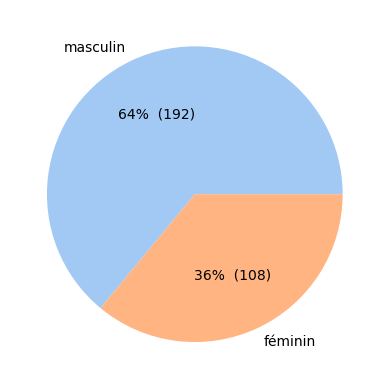

In [235]:
# graphique
donnee = df_data['count']
label = df_data['qLabel.value']
couleur = sns.color_palette("pastel")
plt.pie(donnee, labels = label, colors = couleur, autopct = lambda p : '{:.0f}%  ({:,.0f})'.format(p,p * sum(donnee)/100))
plt.show()

#### A part avoir participer à la commune, que faisaient ces personnes ?

la propriété P106, déjà évoqué, permet de connaitre leur occupation : métiers, loisir...

On peut compter combien de personne participe à chaque occupation. Une personen peut avoir de multiple occupation. Elles peuvent avoir été occupée avant/pendant/après les événements.

##### Au moins deux personnes qui l'occupe

```
SELECT ?occupation ?occupationLabel (COUNT(?communard_ou_communarde) AS ?nombre) WHERE {
  SERVICE wikibase:label { bd:serviceParam wikibase:language "[AUTO_LANGUAGE],en". }
  ?communard_ou_communarde wdt:P106 wd:Q1780490;
                           wdt:P106 ?occupation.
}
GROUP BY ?occupation ?occupationLabel
HAVING (((COUNT(?communard_ou_communarde)) > 1 ) && ((COUNT(?communard_ou_communarde)) < 290 ))# Sélectionner ceux dont il y a plus d'une occurence et moins de 290 pour supprimer communard qui est à plus de 297 le 12 janvier 2023

ORDER BY DESC (?nombre)
```

In [24]:
%%HTML
<iframe style="width: 95%; height: 50vh; border: none;" 
src="https://query.wikidata.org/embed.html#SELECT%20%3Foccupation%20%3FoccupationLabel%20(COUNT(%3Fcommunard_ou_communarde)%20AS%20%3Fnombre)%20WHERE%20%7B%0A%20%20SERVICE%20wikibase%3Alabel%20%7B%20bd%3AserviceParam%20wikibase%3Alanguage%20%22%5BAUTO_LANGUAGE%5D%2Cen%22.%20%7D%0A%20%20%3Fcommunard_ou_communarde%20wdt%3AP106%20wd%3AQ1780490%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20wdt%3AP106%20%3Foccupation.%0A%7D%0AGROUP%20BY%20%3Foccupation%20%3FoccupationLabel%0AHAVING%20(((COUNT(%3Fcommunard_ou_communarde))%20%3E%201%20)%20%26%26%20((COUNT(%3Fcommunard_ou_communarde))%20%3C%20290%20))%23%20S%C3%A9lectionner%20ceux%20dont%20il%20y%20a%20plus%20d'une%20occurence%20et%20moins%20de%20290%20pour%20supprimer%20communard%20qui%20est%20%C3%A0%20plus%20de%20297%20le%2012%20janvier%202023%0A%0AORDER%20BY%20DESC%20(%3Fnombre)" 
referrerpolicy="origin" sandbox="allow-scripts allow-same-origin allow-popups">
</iframe>

#### Quel âge avait ces personnes en 1871

```
#defaultView:AreaChart
SELECT 
  ?age_on_march_18th (COUNT(?communard) AS ?count_persons)
WHERE {
  ?communard wdt:P106 wd:Q1780490;
             wdt:P569 ?birth_date.
  BIND (YEAR("1871-03-18"^^xsd:date) - YEAR(?birth_date) AS ?age_on_march_18th)
  FILTER(?age_on_march_18th > 5)
}
GROUP BY ?age_on_march_18th
```

In [25]:
%%HTML
<iframe style="width: 95%; height: 50vh; border: none;" 
src="https://query.wikidata.org/embed.html#%23defaultView%3AAreaChart%0ASELECT%20%0A%20%20%3Fage_on_march_18th%20(COUNT(%3Fcommunard)%20AS%20%3Fcount_persons)%0AWHERE%20%7B%0A%20%20%3Fcommunard%20wdt%3AP106%20wd%3AQ1780490%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20%20wdt%3AP569%20%3Fbirth_date.%0A%20%20BIND%20(YEAR(%221871-03-18%22%5E%5Exsd%3Adate)%20-%20YEAR(%3Fbirth_date)%20AS%20%3Fage_on_march_18th)%0A%20%20FILTER(%3Fage_on_march_18th%20%3E%205)%0A%7D%0AGROUP%20BY%20%3Fage_on_march_18th%0A" 
referrerpolicy="origin" sandbox="allow-scripts allow-same-origin allow-popups">
</iframe>


#### Une Commune internationale

> pays de citoyenneté (P27)
État dont la personne possède la nationalité

Toute les personne n'ont pas le champs remplit.

```
SELECT ?pays_de_citoyenneté ?pays_de_citoyennetéLabel (count(?pays_de_citoyenneté) as ?nb) WHERE {
  SERVICE wikibase:label { bd:serviceParam wikibase:language "[AUTO_LANGUAGE],en". }
  ?communard_ou_communarde wdt:P106 wd:Q1780490.
  OPTIONAL { ?communard_ou_communarde wdt:P27 ?pays_de_citoyenneté. }
}
group by ?pays_de_citoyenneté ?pays_de_citoyennetéLabel
order by desc(?nb)
```

In [26]:
%%HTML
<iframe style="width: 95%; height: 50vh; border: none;" 
src="https://query.wikidata.org/embed.html#SELECT%20%3Fpays_de_citoyennet%C3%A9%20%3Fpays_de_citoyennet%C3%A9Label%20(count(%3Fpays_de_citoyennet%C3%A9)%20as%20%3Fnb)%20WHERE%20%7B%0A%20%20SERVICE%20wikibase%3Alabel%20%7B%20bd%3AserviceParam%20wikibase%3Alanguage%20%22%5BAUTO_LANGUAGE%5D%2Cen%22.%20%7D%0A%20%20%3Fcommunard_ou_communarde%20wdt%3AP106%20wd%3AQ1780490.%0A%20%20OPTIONAL%20%7B%20%3Fcommunard_ou_communarde%20wdt%3AP27%20%3Fpays_de_citoyennet%C3%A9.%20%7D%0A%7D%0A%0Agroup%20by%20%3Fpays_de_citoyennet%C3%A9%20%3Fpays_de_citoyennet%C3%A9Label%0Aorder%20by%20desc(%3Fnb)" 
referrerpolicy="origin" sandbox="allow-scripts allow-same-origin allow-popups">
</iframe>

### Relations entre communard·e·s

### Partenaires de vie

#### Communard·e·s et leur conjoint·e ou partenaire de vie 

```
SELECT ?communard_ou_communarde ?communard_ou_communardeLabel ?vie_avec ?vie_avecLabel WHERE {
  SERVICE wikibase:label { bd:serviceParam wikibase:language "[AUTO_LANGUAGE],en". }
  ?communard_ou_communarde wdt:P106 wd:Q1780490;
                           wdt:P26|wdt:P451 ?vie_avec.
}
```

In [4]:
%%HTML
<iframe style="width: 95%; height: 50vh; border: none;" 
src="https://query.wikidata.org/embed.html#SELECT%20%3Fcommunard_ou_communarde%20%3Fcommunard_ou_communardeLabel%20%3Fvie_avec%20%3Fvie_avecLabel%20WHERE%20%7B%0A%20%20SERVICE%20wikibase%3Alabel%20%7B%20bd%3AserviceParam%20wikibase%3Alanguage%20%22%5BAUTO_LANGUAGE%5D%2Cen%22.%20%7D%0A%20%20%3Fcommunard_ou_communarde%20wdt%3AP106%20wd%3AQ1780490%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20wdt%3AP26%7Cwdt%3AP451%20%3Fvie_avec.%0A%7D%0A" 
referrerpolicy="origin" sandbox="allow-scripts allow-same-origin allow-popups">
</iframe>

#### Communard·e·s vivant avec un·e autre communard·e·s

```
SELECT ?communard_ou_communarde ?communard_ou_communardeLabel ?vie_avec ?vie_avecLabel WHERE {
  SERVICE wikibase:label { bd:serviceParam wikibase:language "[AUTO_LANGUAGE],en". }
  ?communard_ou_communarde wdt:P106 wd:Q1780490;
                           wdt:P26|wdt:P451 ?vie_avec.
  ?vie_avec wdt:P106 wd:Q1780490.
}
```

In [5]:
%%HTML
<iframe style="width: 95%; height: 50vh; border: none;" 
src="https://query.wikidata.org/embed.html#SELECT%20%3Fcommunard_ou_communarde%20%3Fcommunard_ou_communardeLabel%20%3Fvie_avec%20%3Fvie_avecLabel%20WHERE%20%7B%0A%20%20SERVICE%20wikibase%3Alabel%20%7B%20bd%3AserviceParam%20wikibase%3Alanguage%20%22%5BAUTO_LANGUAGE%5D%2Cen%22.%20%7D%0A%20%20%3Fcommunard_ou_communarde%20wdt%3AP106%20wd%3AQ1780490%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20wdt%3AP26%7Cwdt%3AP451%20%3Fvie_avec.%0A%20%20%3Fvie_avec%20wdt%3AP106%20wd%3AQ1780490.%0A%7D%0A" 
referrerpolicy="origin" sandbox="allow-scripts allow-same-origin allow-popups">
</iframe>

#### Communard·e·s dont le nombre de partenaire est supérieur à 1

Entre la reconnaissance du divorce par la Commune, la durée de vie de certaines personnes... Certaines personnes ont pu vivre avec plusieurs personnes.

```
SELECT ?communard_ou_communarde ?communard_ou_communardeLabel (count(?vie_avec)as ?nb_de_partenaire) WHERE {
  SERVICE wikibase:label { bd:serviceParam wikibase:language "[AUTO_LANGUAGE],en". }
  ?communard_ou_communarde wdt:P106 wd:Q1780490;
                           wdt:P26|wdt:P451 ?vie_avec. 
}
group by ?communard_ou_communarde ?communard_ou_communardeLabel
HAVING(?nb_de_partenaire >1)
```

In [7]:
%%HTML
<iframe style="width: 95%; height: 50vh; border: none;" 
src="https://query.wikidata.org/embed.html#SELECT%20%3Fcommunard_ou_communarde%20%3Fcommunard_ou_communardeLabel%20(count(%3Fvie_avec)as%20%3Fnb_de_partenaire)%20WHERE%20%7B%0A%20%20SERVICE%20wikibase%3Alabel%20%7B%20bd%3AserviceParam%20wikibase%3Alanguage%20%22%5BAUTO_LANGUAGE%5D%2Cen%22.%20%7D%0A%20%20%3Fcommunard_ou_communarde%20wdt%3AP106%20wd%3AQ1780490%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20wdt%3AP26%7Cwdt%3AP451%20%3Fvie_avec.%0A%0A%20%20%0A%7D%0Agroup%20by%20%3Fcommunard_ou_communarde%20%3Fcommunard_ou_communardeLabel%0AHAVING(%3Fnb_de_partenaire%20%3E1)" 
referrerpolicy="origin" sandbox="allow-scripts allow-same-origin allow-popups">
</iframe>

Au 6 mai 2023 il y a :
- 50 couples
- 27 couples de communard·e·s
- 4 personnes ayant vécues avec au moins 2 autres personnes distinctes

### Généalogie

#### Communard·e·s et leurs enfants

```
SELECT ?communard ?communardLabel ?enfant ?enfantLabel
WHERE {
SERVICE wikibase:label { bd:serviceParam wikibase:language "[AUTO_LANGUAGE],en". }

  ?communard wdt:P106 wd:Q1780490;
              wdt:P40 ?enfant.
}
```

In [8]:
%%HTML
<iframe style="width: 95%; height: 50vh; border: none;" 
src="https://query.wikidata.org/embed.html#SELECT%20%3Fcommunard%20%3FcommunardLabel%20%3Fenfant%20%3FenfantLabel%0AWHERE%20%7B%0ASERVICE%20wikibase%3Alabel%20%7B%20bd%3AserviceParam%20wikibase%3Alanguage%20%22%5BAUTO_LANGUAGE%5D%2Cen%22.%20%7D%0A%0A%20%20%3Fcommunard%20wdt%3AP106%20wd%3AQ1780490%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20wdt%3AP40%20%3Fenfant.%0A%7D" 
referrerpolicy="origin" sandbox="allow-scripts allow-same-origin allow-popups">
</iframe>

#### Communard·e·s dont les enfants sont communard·e·s

In [ ]:
```
SELECT ?communard ?communardLabel ?enfant ?enfantLabel
WHERE {
SERVICE wikibase:label { bd:serviceParam wikibase:language "[AUTO_LANGUAGE],en". }

  ?communard wdt:P106 wd:Q1780490;
              wdt:P40 ?enfant.
  ?enfant wdt:P106 wd:Q1780490.
}
```

In [11]:
%%HTML
<iframe style="width: 95%; height: 50vh; border: none;" 
src="https://query.wikidata.org/embed.html#SELECT%20%3Fcommunard%20%3FcommunardLabel%20%3Fenfant%20%3FenfantLabel%0AWHERE%20%7B%0ASERVICE%20wikibase%3Alabel%20%7B%20bd%3AserviceParam%20wikibase%3Alanguage%20%22%5BAUTO_LANGUAGE%5D%2Cen%22.%20%7D%0A%0A%20%20%3Fcommunard%20wdt%3AP106%20wd%3AQ1780490%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20wdt%3AP40%20%3Fenfant.%0A%20%20%3Fenfant%20wdt%3AP106%20wd%3AQ1780490.%0A%7D" 
referrerpolicy="origin" sandbox="allow-scripts allow-same-origin allow-popups">
</iframe>

#### Mini-arbres généalogiques parent(s)-> communard·e -> enfant(s)

```
#defaultView:Graph
SELECT ?parent ?parentLabel ?communard ?communardLabel ?enfant ?enfantLabel WHERE {
SERVICE wikibase:label { bd:serviceParam wikibase:language "[AUTO_LANGUAGE],en". 
                         ?parent rdfs:label ?parentLabel.
                         ?enfant rdfs:label ?enfantLabel.
                         ?communard rdfs:label ?communardLabel }
  
  ?communard wdt:P106 wd:Q1780490.
  Optional {?parent wdt:P40 ?communard.}
  Optional {?communard wdt:P40 ?enfant.}
  
  filter(?parentLabel != "" || ?enfantLabel != "")
}
```

In [13]:
%%HTML
<iframe style="width: 95%; height: 50vh; border: none;" 
src="https://query.wikidata.org/embed.html#%23defaultView%3AGraph%0ASELECT%20%3Fparent%20%3FparentLabel%20%3Fcommunard%20%3FcommunardLabel%20%3Fenfant%20%3FenfantLabel%20WHERE%20%7B%0ASERVICE%20wikibase%3Alabel%20%7B%20bd%3AserviceParam%20wikibase%3Alanguage%20%22%5BAUTO_LANGUAGE%5D%2Cen%22.%20%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%3Fparent%20rdfs%3Alabel%20%3FparentLabel.%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%3Fenfant%20rdfs%3Alabel%20%3FenfantLabel.%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%3Fcommunard%20rdfs%3Alabel%20%3FcommunardLabel%20%7D%0A%20%20%0A%20%20%3Fcommunard%20wdt%3AP106%20wd%3AQ1780490.%0A%20%20Optional%20%7B%3Fparent%20wdt%3AP40%20%3Fcommunard.%7D%0A%20%20Optional%20%7B%3Fcommunard%20wdt%3AP40%20%3Fenfant.%7D%0A%20%20%0A%20%20filter(%3FparentLabel%20!%3D%20%22%22%20%7C%7C%20%3FenfantLabel%20!%3D%20%22%22)%0A%7D%0A" 
referrerpolicy="origin" sandbox="allow-scripts allow-same-origin allow-popups">
</iframe>

#### entitree

Entitree est un outil de visualisation des données, notaments des arbres généalogiques.

On peut regarder par exemple ceux d'<a herf="https://www.entitree.com/fr/family_tree/Herminie_Cadolle?0d0=d">Herminie Cadolle</a> dont le petit fils est champion cycliste, ou celui de Charles Longuet.

https://www.entitree.com/fr/family_tree/Herminie_Cadolle?0d0=d


https://www.entitree.com/fr/arbre_g%C3%A9n%C3%A9alogique/Charles_Longuet?0d0=d&0d0d1=dr&0d1=dr&0d2=d&0d1d2=d

### Reseau social des communard·e·s sur wikidata

#### Graph des communard·e·s et des organismes dont als sont membres

membre de P463

```
#defaultView:Graph
SELECT ?communard_ou_communarde ?communard_ou_communardeLabel ?membre_de ?membre_deLabel WHERE {
  SERVICE wikibase:label { bd:serviceParam wikibase:language "[AUTO_LANGUAGE],en". }
  ?communard_ou_communarde wdt:P106 wd:Q1780490;
                           wdt:P463 ?membre_de.
}
````

In [27]:
%%HTML
<iframe style="width: 95%; height: 50vh; border: none;" 
src="https://query.wikidata.org/embed.html#%23defaultView%3AGraph%0ASELECT%20%3Fcommunard_ou_communarde%20%3Fcommunard_ou_communardeLabel%20%3Fmembre_de%20%3Fmembre_deLabel%20WHERE%20%7B%0A%20%20SERVICE%20wikibase%3Alabel%20%7B%20bd%3AserviceParam%20wikibase%3Alanguage%20%22%5BAUTO_LANGUAGE%5D%2Cen%22.%20%7D%0A%20%20%3Fcommunard_ou_communarde%20wdt%3AP106%20wd%3AQ1780490%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20wdt%3AP463%20%3Fmembre_de.%0A%7D%0A" 
referrerpolicy="origin" sandbox="allow-scripts allow-same-origin allow-popups">
</iframe>

#### nombre par organisme

```
SELECT ?membre_de ?membre_deLabel (count(?membre_deLabel) as ?nombre_de_membre) WHERE {
  SERVICE wikibase:label { bd:serviceParam wikibase:language "[AUTO_LANGUAGE],en". }
  ?communard_ou_communarde wdt:P106 wd:Q1780490;
                           wdt:P463 ?membre_de.
  optional {?membre_de wdt:P18 ?image.}
}

group by ?membre_de ?membre_deLabel
order by desc(?nombre_de_membre)
```

In [28]:
%%HTML
<iframe style="width: 95%; height: 50vh; border: none;" 
src="https://query.wikidata.org/embed.html#SELECT%20%3Fmembre_de%20%3Fmembre_deLabel%20(count(%3Fmembre_deLabel)%20as%20%3Fnombre_de_membre)%20WHERE%20%7B%0A%20%20SERVICE%20wikibase%3Alabel%20%7B%20bd%3AserviceParam%20wikibase%3Alanguage%20%22%5BAUTO_LANGUAGE%5D%2Cen%22.%20%7D%0A%20%20%3Fcommunard_ou_communarde%20wdt%3AP106%20wd%3AQ1780490%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20wdt%3AP463%20%3Fmembre_de.%0A%20%20optional%20%7B%3Fmembre_de%20wdt%3AP18%20%3Fimage.%7D%0A%7D%0A%0Agroup%20by%20%3Fmembre_de%20%3Fmembre_deLabel%0Aorder%20by%20desc(%3Fnombre_de_membre)" 
referrerpolicy="origin" sandbox="allow-scripts allow-same-origin allow-popups">
</iframe>

## Les communardes et communards dans des cimetières
### Généralités
Les communards étant touz* décédæ, c'est notamment dans les cimetières, quand les tombes existent, qu'on peut leur rendre hommage. N'oublions pas que beaucoup sont dans des fossés communes anonymes.

En termes de méthode wikidata nous propose la propriété lieu de sépulture (P119). Selon les précisions cela peut être une ville ou un cimetière. Cet élément possède une propriété coordonnées géographiques.

Pour certaines personnes, la propriété photo de la sépulture est rempli avec une photo de communs.
Pour certaines personnes il existe même un élément pour leur leur tombe. 

On peut donc connaître le nombre de personnes par cimetière.
On peut même les repérer sur un plan.

Au 14 janvier seul le cimetière du Montparnasse est "complet". Celui du père Lachaise est quasiment finit. Aucun des deux ne prends en compte les monuments collectifs.

Pour certain·e·s communard·e·s, le lieu de sépulture (P119) est connu. Pour certain·e·s les coordonnées géographiques de la tombe sont dans wikidata.


> lieu de sépulture (P119)
lieu où le corps du sujet est conservé

### Nombre de personne par cimetière

```
SELECT ?lieu_de_sépulture ?lieu_de_sépultureLabel ?coordonnees (COUNT(*) AS ?count) WHERE {
  SERVICE wikibase:label { bd:serviceParam wikibase:language "[AUTO_LANGUAGE],en". }
 ?communard_ou_communarde wdt:P106 wd:Q1780490;
                           wdt:P119 ?lieu_de_sépulture.
 ?lieu_de_sépulture wdt:P31/wdt:P279* wd:Q39614;
                    wdt:P625 ?coordonnees.
}

group by ?lieu_de_sépulture ?lieu_de_sépultureLabel ?coordonnees
order by desc (?count)
```

In [29]:
%%HTML
<iframe style="width: 95%; height: 50vh; border: none;" 
src="https://query.wikidata.org/embed.html#SELECT%20%3Flieu_de_s%C3%A9pulture%20%3Flieu_de_s%C3%A9pultureLabel%20%3Fcoordonnees%20(COUNT(*)%20AS%20%3Fcount)%20WHERE%20%7B%0A%20%20SERVICE%20wikibase%3Alabel%20%7B%20bd%3AserviceParam%20wikibase%3Alanguage%20%22%5BAUTO_LANGUAGE%5D%2Cen%22.%20%7D%0A%20%3Fcommunard_ou_communarde%20wdt%3AP106%20wd%3AQ1780490%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20wdt%3AP119%20%3Flieu_de_s%C3%A9pulture.%0A%20%3Flieu_de_s%C3%A9pulture%20wdt%3AP31%2Fwdt%3AP279*%20wd%3AQ39614%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20wdt%3AP625%20%3Fcoordonnees.%0A%7D%0A%0Agroup%20by%20%3Flieu_de_s%C3%A9pulture%20%3Flieu_de_s%C3%A9pultureLabel%20%3Fcoordonnees%0Aorder%20by%20desc%20(%3Fcount)" 
referrerpolicy="origin" sandbox="allow-scripts allow-same-origin allow-popups">
</iframe>

### Cimetière du Montparnasse
Cartes des tombes de communard·e·s ou de personnes ayant un lien avec la Commune dans le cimetière du Montparnasse (Q272208).


```
#defaultView:Map
SELECT Distinct ?tombe ?tombeLabel ?image_Tombe ?coordonnées ?tombe_deLabel ?image_personne WHERE {
  SERVICE wikibase:label { bd:serviceParam wikibase:language "[AUTO_LANGUAGE],en". }
  
  #Qui, les communard-e-s et la liste des personnes lors de la cérémonie
  ?communard wdt:P106 wd:Q1780490;
             wdt:P119 wd:Q272208.
  Values ?personnalite {wd:Q313709 
                        wd:Q61897268 
                        wd:Q5749
                        wd:Q1959369
                        wd:Q3047711
                        wd:Q3022660
                        wd:Q551648
                        wd:Q704649
                        wd:Q2826417
                        wd:Q3302715
                        wd:Q337628}
  #Chercher les tombes du cimetière montparnasse                      
  ?tombe wdt:P361 wd:Q272208;
         wdt:P547 ?tombe_de.        
  #Prendre les tombes voulues
  filter (?tombe_de =?communard || ?tombe_de=?personnalite)
  
  OPTIONAL {?tombe wdt:P18 ?image_Tombe.}
  OPTIONAL {?tombe wdt:P625 ?coordonnées.}
  OPTIONAL {?tombe_de wdt:P18 ?image_personne.}
  
}
```

In [30]:
%%HTML
<iframe style="width: 95%; height: 75vh; border: none;" 
src="https://query.wikidata.org/embed.html#%23defaultView%3AMap%0ASELECT%20Distinct%20%3Ftombe%20%3FtombeLabel%20%3Fimage_Tombe%20%3Fcoordonn%C3%A9es%20%3Ftombe_deLabel%20%3Fimage_personne%20WHERE%20%7B%0A%20%20SERVICE%20wikibase%3Alabel%20%7B%20bd%3AserviceParam%20wikibase%3Alanguage%20%22%5BAUTO_LANGUAGE%5D%2Cen%22.%20%7D%0A%20%20%0A%20%20%23Qui%2C%20les%20communard-e-s%20et%20la%20liste%20des%20personnes%20lors%20de%20la%20c%C3%A9r%C3%A9monie%0A%20%20%3Fcommunard%20wdt%3AP106%20wd%3AQ1780490%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20%20wdt%3AP119%20wd%3AQ272208.%0A%20%20Values%20%3Fpersonnalite%20%7Bwd%3AQ313709%20%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20wd%3AQ61897268%20%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20wd%3AQ5749%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20wd%3AQ1959369%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20wd%3AQ3047711%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20wd%3AQ3022660%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20wd%3AQ551648%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20wd%3AQ704649%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20wd%3AQ2826417%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20wd%3AQ3302715%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20wd%3AQ337628%7D%0A%20%20%23Chercher%20les%20tombes%20du%20cimeti%C3%A8re%20montparnasse%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%0A%20%20%3Ftombe%20wdt%3AP361%20wd%3AQ272208%3B%0A%20%20%20%20%20%20%20%20%20wdt%3AP547%20%3Ftombe_de.%20%20%20%20%20%20%20%20%0A%20%20%23Prendre%20les%20tombes%20voulues%0A%20%20filter%20(%3Ftombe_de%20%3D%3Fcommunard%20%7C%7C%20%3Ftombe_de%3D%3Fpersonnalite)%0A%20%20%0A%20%20OPTIONAL%20%7B%3Ftombe%20wdt%3AP18%20%3Fimage_Tombe.%7D%0A%20%20OPTIONAL%20%7B%3Ftombe%20wdt%3AP625%20%3Fcoordonn%C3%A9es.%7D%0A%20%20OPTIONAL%20%7B%3Ftombe_de%20wdt%3AP18%20%3Fimage_personne.%7D%0A%20%20%0A%7D" 
referrerpolicy="origin" 
sandbox="allow-scripts allow-same-origin allow-popups">
</iframe>

### Cimetière du Père la Chaise
Cartes des tombes de communard·e·s ou de personnes ayant un lien avec la Commune dans le cimetière du Père-Lahaise (Q311).

```
#defaultView:Map
SELECT Distinct ?tombe ?tombeLabel ?image_Tombe ?coordonnées ?tombe_deLabel ?image_personne WHERE {
  SERVICE wikibase:label { bd:serviceParam wikibase:language "[AUTO_LANGUAGE],en". }
  
  #Qui, les communard-e-s
  ?communard wdt:P106 wd:Q1780490;
             wdt:P119 wd:Q311.

  #Chercher les tombes du cimetière montparnasse                      
  ?tombe wdt:P276 ?lieu;
         wdt:P547 ?tombe_de. 
  
  ?lieu wdt:P361 wd:Q311.
        
  #Prendre les tombes voulues
  filter (?tombe_de =?communard)
  
  OPTIONAL {?tombe wdt:P18 ?image_Tombe.}
  OPTIONAL {?tombe wdt:P625 ?coordonnées.}
  OPTIONAL {?tombe_de wdt:P18 ?image_personne.}
  
}
```

In [31]:
%%HTML
<iframe style="width: 95%; height: 50vh; border: none;" 
src="https://query.wikidata.org/embed.html#%23defaultView%3AMap%0ASELECT%20Distinct%20%3Ftombe%20%3FtombeLabel%20%3Fimage_Tombe%20%3Fcoordonn%C3%A9es%20%3Ftombe_deLabel%20%3Fimage_personne%20WHERE%20%7B%0A%20%20SERVICE%20wikibase%3Alabel%20%7B%20bd%3AserviceParam%20wikibase%3Alanguage%20%22%5BAUTO_LANGUAGE%5D%2Cen%22.%20%7D%0A%20%20%0A%20%20%23Qui%2C%20les%20communard-e-s%0A%20%20%3Fcommunard%20wdt%3AP106%20wd%3AQ1780490%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20%20wdt%3AP119%20wd%3AQ311.%0A%0A%20%20%23Chercher%20les%20tombes%20du%20cimeti%C3%A8re%20montparnasse%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%0A%20%20%3Ftombe%20wdt%3AP276%20%3Flieu%3B%0A%20%20%20%20%20%20%20%20%20wdt%3AP547%20%3Ftombe_de.%20%0A%20%20%0A%20%20%3Flieu%20wdt%3AP361%20wd%3AQ311.%0A%20%20%20%20%20%20%20%20%0A%20%20%23Prendre%20les%20tombes%20voulues%0A%20%20filter%20(%3Ftombe_de%20%3D%3Fcommunard)%0A%20%20%0A%20%20OPTIONAL%20%7B%3Ftombe%20wdt%3AP18%20%3Fimage_Tombe.%7D%0A%20%20OPTIONAL%20%7B%3Ftombe%20wdt%3AP625%20%3Fcoordonn%C3%A9es.%7D%0A%20%20OPTIONAL%20%7B%3Ftombe_de%20wdt%3AP18%20%3Fimage_personne.%7D%0A%20%20%0A%7D%0A"referrerpolicy="origin" 
sandbox="allow-scripts allow-same-origin allow-popups">
</iframe>


## Une chronologie de la Commune

Pour tous les éléments faisant partie de (P361) la Commune, affiche leurs dates connues.
Idem pour les communard·e·s.

De ce tableau ou peut faire une frise chronologique.

```
SELECT 
?Commune_de_Paris ?Commune_de_ParisLabel ?date ?date_de_début ?date_de_fin
?Communard_ou_communarde ?Communard_ou_communardeLabel ?date_deces
WHERE {
  SERVICE wikibase:label { bd:serviceParam wikibase:language "[AUTO_LANGUAGE],en". }
  {
    # Partie de la Commune
    ?Commune_de_Paris wdt:P361 wd:Q133132.
  OPTIONAL { ?Commune_de_Paris wdt:P585 ?date. }
  OPTIONAL { ?Commune_de_Paris wdt:P580 ?date_de_début. }
  OPTIONAL { ?Commune_de_Paris wdt:P582 ?date_de_fin. }
    }
  Union
  {
  # Communard-e-s
  ?Communard_ou_communarde wdt:P106 wd:Q1780490;
                           wdt:P570 ?date_deces.
    FILTER (year(?date_deces)<1872)
    }
}
```

In [32]:
%%HTML
<iframe style="width: 95%; height: 50vh; border: none;" 
src="https://query.wikidata.org/embed.html#SELECT%20%0A%3FCommune_de_Paris%20%3FCommune_de_ParisLabel%20%3Fdate%20%3Fdate_de_d%C3%A9but%20%3Fdate_de_fin%0A%3FCommunard_ou_communarde%20%3FCommunard_ou_communardeLabel%20%3Fdate_deces%0AWHERE%20%7B%0A%20%20SERVICE%20wikibase%3Alabel%20%7B%20bd%3AserviceParam%20wikibase%3Alanguage%20%22%5BAUTO_LANGUAGE%5D%2Cen%22.%20%7D%0A%20%20%23%20Partie%20de%20la%20Commune%0A%20%20%7B%0A%20%20%20%20%3FCommune_de_Paris%20wdt%3AP361%20wd%3AQ133132.%0A%20%20OPTIONAL%20%7B%20%3FCommune_de_Paris%20wdt%3AP585%20%3Fdate.%20%7D%0A%20%20OPTIONAL%20%7B%20%3FCommune_de_Paris%20wdt%3AP580%20%3Fdate_de_d%C3%A9but.%20%7D%0A%20%20OPTIONAL%20%7B%20%3FCommune_de_Paris%20wdt%3AP582%20%3Fdate_de_fin.%20%7D%0A%20%20%20%20%7D%0A%20%20Union%0A%20%20%7B%0A%20%20%23%20Communard-e-s%0A%20%20%3FCommunard_ou_communarde%20wdt%3AP106%20wd%3AQ1780490%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20wdt%3AP570%20%3Fdate_deces.%0A%20%20%20%20FILTER%20(year(%3Fdate_deces)%3C1872)%0A%20%20%20%20%7D%0A%7D%0A" 
referrerpolicy="origin" sandbox="allow-scripts allow-same-origin allow-popups">
</iframe>

### version étendue
avec commune, semaine sanglante, campagne de l'intérieur

```
SELECT distinct
?Commune_de_Paris ?Commune_de_ParisLabel ?date ?date_de_début ?date_de_fin ?date_de_publication
?Communard_ou_communarde ?Communard_ou_communardeLabel ?date_deces
WHERE {
  SERVICE wikibase:label { bd:serviceParam wikibase:language "[AUTO_LANGUAGE],en". }
  values ?periodes {wd:Q133132 #commune de Paris
          wd:Q3478362 #semaine sanglante
          wd:Q47007501 #campagne de l'intérieur
          }
          
  {
    # Partie de la Commune
    ?Commune_de_Paris wdt:P361 ?periodes
  OPTIONAL { ?Commune_de_Paris wdt:P585 ?date. }
  OPTIONAL { ?Commune_de_Paris wdt:P580 ?date_de_début. }
  OPTIONAL { ?Commune_de_Paris wdt:P582 ?date_de_fin. }
  OPTIONAL { ?Commune_de_Paris wdt:P577 ?date_de_publication.}
    }
  Union
  {
  # Communard-e-s
  ?Communard_ou_communarde wdt:P106 wd:Q1780490;
                           wdt:P570 ?date_deces.
    FILTER (year(?date_deces)<1872)
    }
}
```

In [33]:
%%HTML
<iframe style="width: 95%; height: 50vh; border: none;" 
src="https://query.wikidata.org/embed.html#SELECT%20distinct%0A%3FCommune_de_Paris%20%3FCommune_de_ParisLabel%20%3Fdate%20%3Fdate_de_d%C3%A9but%20%3Fdate_de_fin%20%3Fdate_de_publication%0A%3FCommunard_ou_communarde%20%3FCommunard_ou_communardeLabel%20%3Fdate_deces%0AWHERE%20%7B%0A%20%20SERVICE%20wikibase%3Alabel%20%7B%20bd%3AserviceParam%20wikibase%3Alanguage%20%22%5BAUTO_LANGUAGE%5D%2Cen%22.%20%7D%0A%20%20values%20%3Fperiodes%20%7Bwd%3AQ133132%20%23commune%20de%20Paris%0A%20%20%20%20%20%20%20%20%20%20wd%3AQ3478362%20%23semaine%20sanglante%0A%20%20%20%20%20%20%20%20%20%20wd%3AQ47007501%20%23campagne%20de%20l'int%C3%A9rieur%0A%20%20%20%20%20%20%20%20%20%20%7D%0A%20%20%20%20%20%20%20%20%20%20%0A%20%20%7B%0A%20%20%20%20%23%20Partie%20de%20la%20Commune%0A%20%20%20%20%3FCommune_de_Paris%20wdt%3AP361%20%3Fperiodes%0A%20%20OPTIONAL%20%7B%20%3FCommune_de_Paris%20wdt%3AP585%20%3Fdate.%20%7D%0A%20%20OPTIONAL%20%7B%20%3FCommune_de_Paris%20wdt%3AP580%20%3Fdate_de_d%C3%A9but.%20%7D%0A%20%20OPTIONAL%20%7B%20%3FCommune_de_Paris%20wdt%3AP582%20%3Fdate_de_fin.%20%7D%0A%20%20OPTIONAL%20%7B%20%3FCommune_de_Paris%20wdt%3AP577%20%3Fdate_de_publication.%7D%0A%20%20%20%20%7D%0A%20%20Union%0A%20%20%7B%0A%20%20%23%20Communard-e-s%0A%20%20%3FCommunard_ou_communarde%20wdt%3AP106%20wd%3AQ1780490%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20wdt%3AP570%20%3Fdate_deces.%0A%20%20%20%20FILTER%20(year(%3Fdate_deces)%3C1872)%0A%20%20%20%20%7D%0A%7D%0A" 
referrerpolicy="origin" sandbox="allow-scripts allow-same-origin allow-popups">
</iframe>

## Les affiches

```
SELECT ?affiche ?afficheLabel ?date_de_publication ?image WHERE {
  SERVICE wikibase:label { bd:serviceParam wikibase:language "[AUTO_LANGUAGE],en". }
  ?affiche wdt:P31 wd:Q429785.
  {?affiche wdt:P361 wd:Q690489.}
  Union {?affiche wdt:P361 wd:Q133132}
  OPTIONAL { ?affiche wdt:P577 ?date_de_publication. }
  OPTIONAL { ?affiche wdt:P18 ?image. }
}
```

In [34]:
%%HTML
<iframe style="width: 95%; height: 50vh; border: none;" 
src="https://query.wikidata.org/embed.html#SELECT%20%3Faffiche%20%3FafficheLabel%20%3Fdate_de_publication%20%3Fimage%20WHERE%20%7B%0A%20%20SERVICE%20wikibase%3Alabel%20%7B%20bd%3AserviceParam%20wikibase%3Alanguage%20%22%5BAUTO_LANGUAGE%5D%2Cen%22.%20%7D%0A%20%20%3Faffiche%20wdt%3AP31%20wd%3AQ429785.%0A%20%20%7B%3Faffiche%20wdt%3AP361%20wd%3AQ690489.%7D%0A%20%20Union%20%7B%3Faffiche%20wdt%3AP361%20wd%3AQ133132%7D%0A%20%20OPTIONAL%20%7B%20%3Faffiche%20wdt%3AP577%20%3Fdate_de_publication.%20%7D%0A%20%20OPTIONAL%20%7B%20%3Faffiche%20wdt%3AP18%20%3Fimage.%20%7D%0A%7D%0A" 
referrerpolicy="origin" sandbox="allow-scripts allow-same-origin allow-popups">
</iframe>

## Les barricades

> barricade (Q81715)
muraille désorganisée de pavés, galets, poutres, etc. qui barre une rue.

De nombreuses barricades ont été dressées dans les rues de Paris. Certaines ont été prises en photo et ou mentionnées dans différents écrits.

Dans un premier temps, à partir des photos de Commons (https://commons.wikimedia.org/wiki/Category:Barricades_during_Paris_Commune) on peut les rentrer dans wikidata et à l'aide de leurs coordonnées géographiques (P625) les placer sur une carte.

Ces coordonnées sont inscrites dans la base de données via l'analyse des photos.
À l'aide des bâtiments, nom de rue... on peut les identifier sur un plan et via les photos de Google street Map.
C'est par exemple très visible sur les barricades autour de la Concorde et des bâtiments.
Idem la position de la barricade du pont d'Arcole est affiné par un photo de destructions de l'hôtel de ville où le kiosque est visible.

```
SELECT ?barricade ?barricadeLabel ?coordonnées_géographiques ?image ?catégorie_Commons ?date_de_début ?date_de_fin WHERE {
  SERVICE wikibase:label { bd:serviceParam wikibase:language "[AUTO_LANGUAGE],en". }
  ?barricade wdt:P31 wd:Q81715;
    wdt:P361 wd:Q133132.
  OPTIONAL { ?barricade wdt:P625 ?coordonnées_géographiques. }
  OPTIONAL { ?barricade wdt:P18 ?image. }
  OPTIONAL { ?barricade wdt:P373 ?catégorie_Commons. }
  OPTIONAL { ?barricade wdt:P580 ?date_de_début. }
  OPTIONAL { ?barricade wdt:P582 ?date_de_fin. }
}
```

In [35]:
%%HTML
<iframe style="width: 95%; height: 50vh; border: none;" 
src="https://query.wikidata.org/embed.html#SELECT%20%3Fbarricade%20%3FbarricadeLabel%20%3Fcoordonn%C3%A9es_g%C3%A9ographiques%20%3Fimage%20%3Fcat%C3%A9gorie_Commons%20%3Fdate_de_d%C3%A9but%20%3Fdate_de_fin%20WHERE%20%7B%0A%20%20SERVICE%20wikibase%3Alabel%20%7B%20bd%3AserviceParam%20wikibase%3Alanguage%20%22%5BAUTO_LANGUAGE%5D%2Cen%22.%20%7D%0A%20%20%3Fbarricade%20wdt%3AP31%20wd%3AQ81715%3B%0A%20%20%20%20wdt%3AP361%20wd%3AQ133132.%0A%20%20OPTIONAL%20%7B%20%3Fbarricade%20wdt%3AP625%20%3Fcoordonn%C3%A9es_g%C3%A9ographiques.%20%7D%0A%20%20OPTIONAL%20%7B%20%3Fbarricade%20wdt%3AP18%20%3Fimage.%20%7D%0A%20%20OPTIONAL%20%7B%20%3Fbarricade%20wdt%3AP373%20%3Fcat%C3%A9gorie_Commons.%20%7D%0A%20%20OPTIONAL%20%7B%20%3Fbarricade%20wdt%3AP580%20%3Fdate_de_d%C3%A9but.%20%7D%0A%20%20OPTIONAL%20%7B%20%3Fbarricade%20wdt%3AP582%20%3Fdate_de_fin.%20%7D%0A%7D%0A" 
referrerpolicy="origin" sandbox="allow-scripts allow-same-origin allow-popups">
</iframe>

## Elle n'est pas morte

### Chansons de la commune et sur la commune

#### chansons, oeuvre... par auteur, parolier... 
A trier/vérifier/compléter

```
SELECT DISTINCT ?chanson ?chansonLabel ?auteur ?auteurLabel ?date_creation WHERE {
  SERVICE wikibase:label { bd:serviceParam wikibase:language "[AUTO_LANGUAGE],en". }
  VALUES ?nature {
    wd:Q105543609
    wd:Q3331189
  }
  ?chanson wdt:P31 ?nature;
    (wdt:P921|wdt:P547) wd:Q133132;
    wdt:P7937 wd:Q7366.
  OPTIONAL { ?chanson (wdt:P50|wdt:P676) ?auteur. }
  OPTIONAL { ?chanson wdt:P571 ?date_creation. }
}
```

In [1]:
%%HTML
<iframe style="width: 80vw; height: 50vh; border: none;" 
src="https://query.wikidata.org/embed.html#SELECT%20DISTINCT%20%3Fchanson%20%3FchansonLabel%20%3Fauteur%20%3FauteurLabel%20%3Fdate_creation%20WHERE%20%7B%0A%20%20SERVICE%20wikibase%3Alabel%20%7B%20bd%3AserviceParam%20wikibase%3Alanguage%20%22%5BAUTO_LANGUAGE%5D%2Cen%22.%20%7D%0A%20%20VALUES%20%3Fnature%20%7B%0A%20%20%20%20wd%3AQ105543609%0A%20%20%20%20wd%3AQ3331189%0A%20%20%7D%0A%20%20%3Fchanson%20wdt%3AP31%20%3Fnature%3B%0A%20%20%20%20(wdt%3AP921%7Cwdt%3AP547)%20wd%3AQ133132%3B%0A%20%20%20%20wdt%3AP7937%20wd%3AQ7366.%0A%20%20OPTIONAL%20%7B%20%3Fchanson%20(wdt%3AP50%7Cwdt%3AP676)%20%3Fauteur.%20%7D%0A%20%20OPTIONAL%20%7B%20%3Fchanson%20wdt%3AP571%20%3Fdate_creation.%20%7D%0A%7D" 
referrerpolicy="origin" sandbox="allow-scripts allow-same-origin allow-popups">
</iframe>

#### Pour consulter les paroles sur wikisources

```
SELECT DISTINCT ?chanson ?wikisourceSitelink WHERE {
  ?wikisourceSitelink schema:isPartOf [ wikibase:wikiGroup "wikisource" ];
                      schema:inLanguage "fr"; #?wikisourceLanguage;
                      schema:about ?chanson.
  values ?nature{wd:Q105543609 
                  wd:Q3331189 }
  
  ?chanson wdt:P31 ?nature;
         wdt:P921 wd:Q133132;
         wdt:P7937 wd:Q7366.
}
```

In [2]:
%%HTML
<iframe style="width: 80vw; height: 50vh; border: none;" 
src="https://query.wikidata.org/embed.html#SELECT%20DISTINCT%20%3Fchanson%20%3FwikisourceSitelink%20WHERE%20%7B%0A%20%20%3FwikisourceSitelink%20schema%3AisPartOf%20%5B%20wikibase%3AwikiGroup%20%22wikisource%22%20%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20schema%3AinLanguage%20%22fr%22%3B%20%23%3FwikisourceLanguage%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20schema%3Aabout%20%3Fchanson.%0A%20%20values%20%3Fnature%7Bwd%3AQ105543609%20%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20wd%3AQ3331189%20%7D%0A%20%20%0A%20%20%3Fchanson%20wdt%3AP31%20%3Fnature%3B%0A%20%20%20%20%20%20%20%20%20wdt%3AP921%20wd%3AQ133132%3B%0A%20%20%20%20%20%20%20%20%20wdt%3AP7937%20wd%3AQ7366.%0A%7D%0A" 
referrerpolicy="origin" sandbox="allow-scripts allow-same-origin allow-popups">
</iframe>

### Commémore

>  commémore (P547)
ce que commémore le lieu, le monument, le mémorial, le jour férié

```
SELECT ?Commune_de_Paris ?Commune_de_ParisLabel WHERE {
  SERVICE wikibase:label { bd:serviceParam wikibase:language "[AUTO_LANGUAGE],en". }
  ?Commune_de_Paris wdt:P547 wd:Q133132.
}
LIMIT 100
```

In [36]:
%%HTML
<iframe style="width: 95%; height: 50vh; border: none;" 
src="https://query.wikidata.org/embed.html#SELECT%20%3FCommune_de_Paris%20%3FCommune_de_ParisLabel%20WHERE%20%7B%0A%20%20SERVICE%20wikibase%3Alabel%20%7B%20bd%3AserviceParam%20wikibase%3Alanguage%20%22%5BAUTO_LANGUAGE%5D%2Cen%22.%20%7D%0A%20%20%3FCommune_de_Paris%20wdt%3AP547%20wd%3AQ133132.%0A%7D%0ALIMIT%20100" 
referrerpolicy="origin" sandbox="allow-scripts allow-same-origin allow-popups">
</iframe>

### Des expositions

```
SELECT ?exposition ?expositionLabel WHERE {
  SERVICE wikibase:label { bd:serviceParam wikibase:language "[AUTO_LANGUAGE],en". }
  ?exposition (wdt:P31/wdt:P279) wd:Q464980;
    wdt:P921 wd:Q133132.
}
```

In [37]:
%%HTML
<iframe style="width: 95%; height: 50vh; border: none;" 
src="https://query.wikidata.org/embed.html#SELECT%20%3Fexposition%20%3FexpositionLabel%20WHERE%20%7B%0A%20%20SERVICE%20wikibase%3Alabel%20%7B%20bd%3AserviceParam%20wikibase%3Alanguage%20%22%5BAUTO_LANGUAGE%5D%2Cen%22.%20%7D%0A%20%20%3Fexposition%20(wdt%3AP31%2Fwdt%3AP279)%20wd%3AQ464980%3B%0A%20%20%20%20wdt%3AP921%20wd%3AQ133132.%0A%7D" 
referrerpolicy="origin" sandbox="allow-scripts allow-same-origin allow-popups">
</iframe>

## Licence

Ce travail est sous licence libre plus précisement Creative Commons Attribution - Partage dans les Mêmes Conditions 4.0 International.
Il est fait à partir de données libres (diverse licence) et logiciels ou formats libres.
Citons python, notebook, makedon, mediawiki...
J'autorise la diffusion commerciale pour payer les frais de papier si quelqu'an veut le diffuser en version papier.
Par principe, la licence vous autorise à utiliser ce travail sans m'en informer, juste pour ma curiosité, merci de me le signaler.

<a rel="license" href="http://creativecommons.org/licenses/by-sa/4.0/"><img alt="Licence Creative Commons" style="border-width:0" src="https://i.creativecommons.org/l/by-sa/4.0/88x31.png" /></a><br />Cette œuvre est mise à disposition selon les termes de la <a rel="license" href="http://creativecommons.org/licenses/by-sa/4.0/">Licence Creative Commons Attribution -  Partage dans les Mêmes Conditions 4.0 International</a>.

## Me contacter
- https://github.com/silanoc
- silanoc@gmail.com
- https://www.linkedin.com/in/gabriel-le-bernard/
- mastondon : @Gabrielhle@pouet.chapril.org
